# Setup

In [1]:
!pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

### Download the dataset

In [3]:
path = kagglehub.dataset_download("shuyangli94/food-com-recipes-and-user-interactions")
print("Path to dataset files:", path)

# List all files in the dataset directory
dataset_files = os.listdir(path)
print("Files in the dataset:", dataset_files)

Path to dataset files: /home/jweston/.cache/kagglehub/datasets/shuyangli94/food-com-recipes-and-user-interactions/versions/2
Files in the dataset: ['RAW_recipes.csv', 'PP_users.csv', 'interactions_test.csv', 'interactions_train.csv', 'PP_recipes.csv', 'ingr_map.pkl', 'interactions_validation.csv', 'RAW_interactions.csv']


### Create dictionary for each dataset

In [4]:
# Dictionary to store DataFrames for each useful file
dataframes = {}

# Load each useful CSV file into a DataFrame dictionary
for file_name in dataset_files:
    file_path = os.path.join(path, file_name)
    if file_name.endswith('.csv') and os.path.exists(file_path):
        print(f"Loading {file_name} into a DataFrame...")
        df_name = file_name.split('.')[0]  # Use filename without extension as key
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"Loaded {file_name} with {dataframes[df_name].shape[0]} rows and {dataframes[df_name].shape[1]} columns.")

Loading RAW_recipes.csv into a DataFrame...
Loaded RAW_recipes.csv with 231637 rows and 12 columns.
Loading PP_users.csv into a DataFrame...
Loaded PP_users.csv with 25076 rows and 6 columns.
Loading interactions_test.csv into a DataFrame...
Loaded interactions_test.csv with 12455 rows and 6 columns.
Loading interactions_train.csv into a DataFrame...
Loaded interactions_train.csv with 698901 rows and 6 columns.
Loading PP_recipes.csv into a DataFrame...
Loaded PP_recipes.csv with 178265 rows and 8 columns.
Loading interactions_validation.csv into a DataFrame...
Loaded interactions_validation.csv with 7023 rows and 6 columns.
Loading RAW_interactions.csv into a DataFrame...
Loaded RAW_interactions.csv with 1132367 rows and 5 columns.


### Example: Access the RAW_recipes DataFrame

In [5]:
raw_recipes_df = dataframes.get('RAW_recipes')
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


# EDA: Recipes Dataset

### Top 10 Most Common Tags

### Number of Ingredients vs. Number of Steps

In [6]:
# Rename the 'id' column in raw_recipes_df to match the 'recipe_id' column in RAW_interactions_df
raw_recipes_df = raw_recipes_df.rename(columns={'id': 'recipe_id'})

# Merge the datasets
merged_df = pd.merge(raw_recipes_df, dataframes['RAW_interactions'], on='recipe_id', how='inner')

# Verify the merge
print("Merged DataFrame shape:", merged_df.shape)
merged_df.head()


Merged DataFrame shape: (1132367, 16)


,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,2010-08-21,5,This was a nice change. I used butternut squas...
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,178427,2011-12-05,5,Excellent recipe! I used butternut squash and ...
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,28603,2002-08-19,0,"Have not tried this, but it sounds delicious. ..."
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,346277,2006-08-27,5,This recipe was wonderful. Instead of using t...


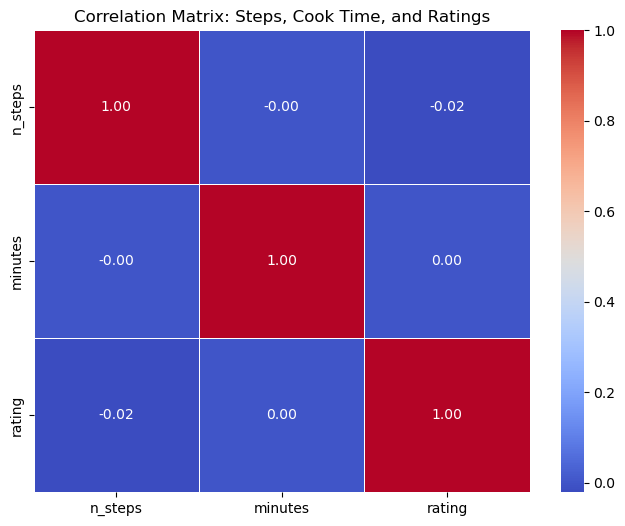

In [7]:
# Correlation Matrix
correlation_matrix = merged_df[['n_steps', 'minutes', 'rating']].corr()

# Heatmap of Correlation Matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Steps, Cook Time, and Ratings')
plt.show()

/tmp/ipykernel_1185/75817340.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_rating = merged_df.groupby('time_bin')['rating'].mean().reset_index()


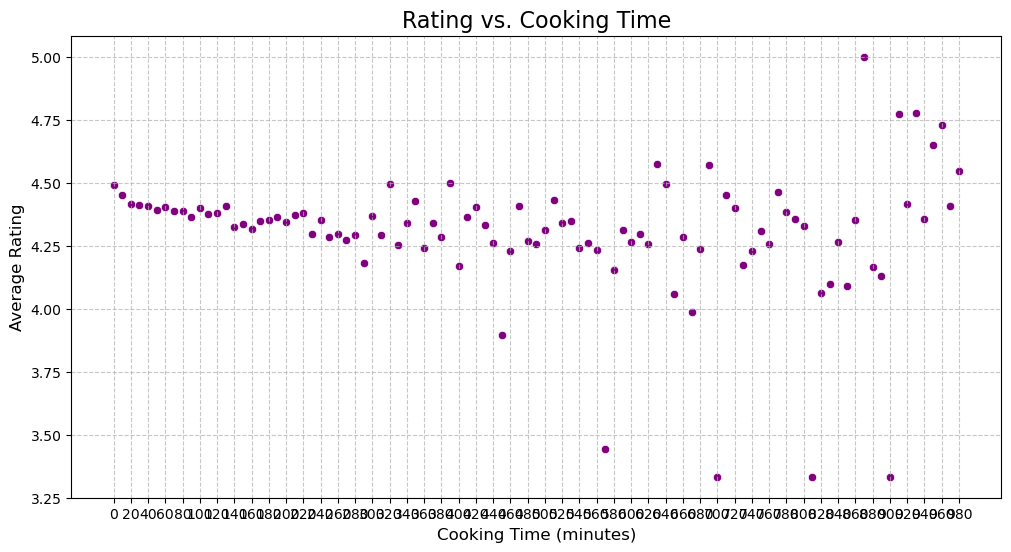

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `merged_df` is already defined and has 'minutes' and 'rating' columns

# Clean the `minutes` column: remove invalid or extreme values if necessary
merged_df = merged_df[merged_df['minutes'] > 0]  # Exclude non-positive times
merged_df = merged_df[merged_df['minutes'] < 1000]  # Exclude excessively high times (adjust as needed)

# Create bins for cooking times (e.g., every 10 minutes)
bins = np.arange(0, merged_df['minutes'].max() + 10, 10)  # 10-minute intervals
merged_df['time_bin'] = pd.cut(merged_df['minutes'], bins=bins, labels=bins[:-1])

# Group by the bins and calculate average rating
time_rating = merged_df.groupby('time_bin')['rating'].mean().reset_index()

# Convert `time_bin` to integer for plotting
time_rating['time_bin'] = time_rating['time_bin'].astype(int)

# Create the scatter plot for rating vs cooking time
plt.figure(figsize=(12, 6))
sns.scatterplot(data=time_rating, x='time_bin', y='rating', color='purple')

# Customize the plot
plt.title('Rating vs. Cooking Time', fontsize=16)
plt.xlabel('Cooking Time (minutes)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Ensure the x-axis has meaningful ticks
plt.xticks(ticks=np.arange(0, time_rating['time_bin'].max() + 20, 20))  # 20-minute intervals
plt.show()


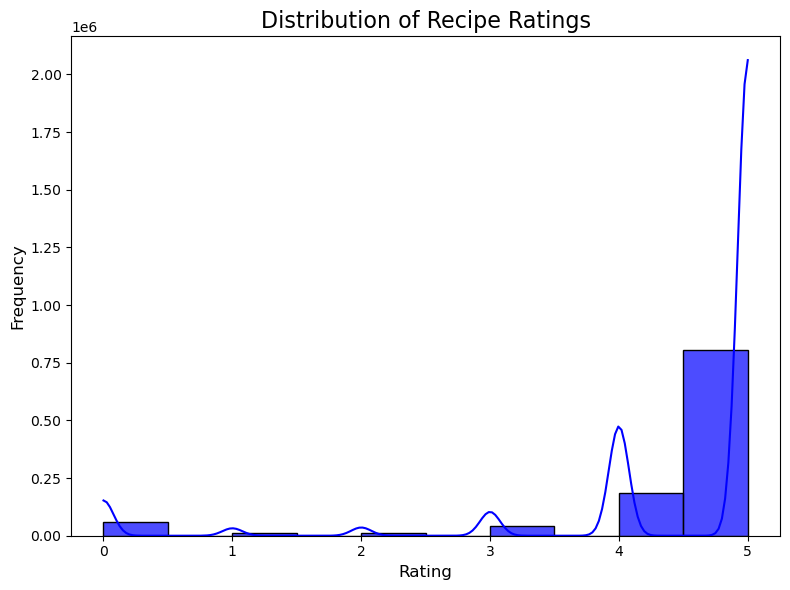

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['rating'], bins=10, kde=True, color='blue', alpha=0.7)
plt.title("Distribution of Recipe Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

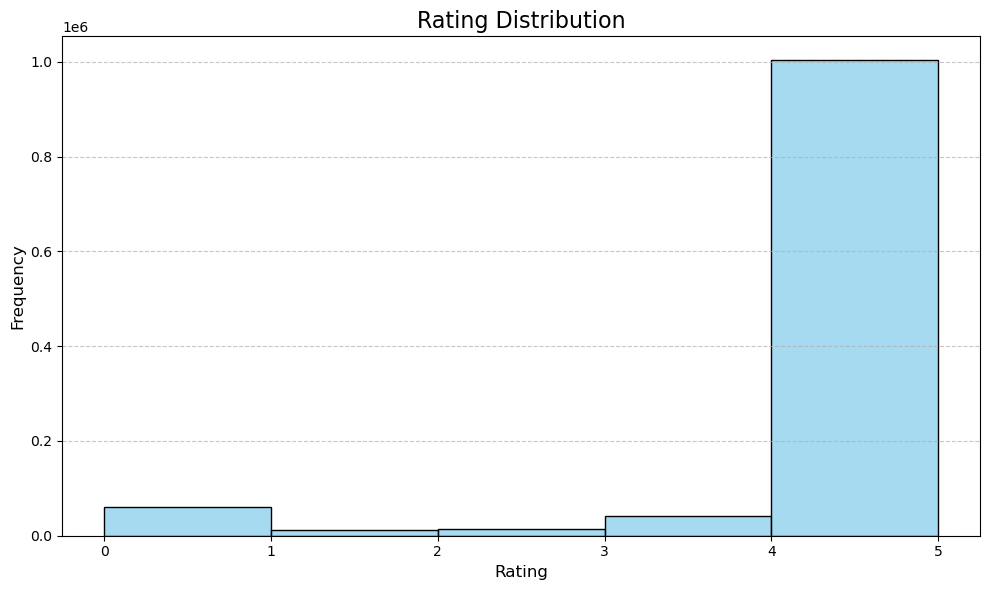

count    1.132367e+06
mean     4.411016e+00
std      1.264752e+00
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64
Unique ratings: [4 5 0 2 3 1]


In [10]:
# Extracting the DataFrames for recipes and interactions
raw_recipes_df = dataframes.get('RAW_recipes')
raw_interactions_df = dataframes.get('RAW_interactions')

# Plot 1: Rating Distribution with Frequency Counts
plt.figure(figsize=(10, 6))
sns.histplot(raw_interactions_df['rating'], bins=range(0, 6), kde=False, color='skyblue', stat='count')
plt.title('Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(raw_interactions_df['rating'].describe())
print("Unique ratings:", raw_interactions_df['rating'].unique())

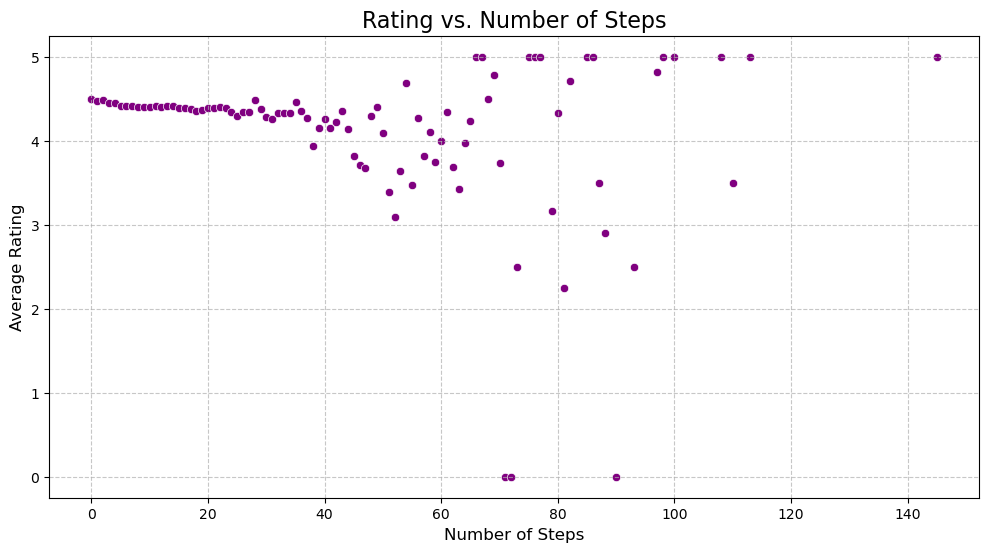

In [11]:
merged_df = raw_interactions_df.merge(
    raw_recipes_df[['id', 'n_steps']], 
    left_on='recipe_id', 
    right_on='id', 
    how='inner'
)

# Group by number of steps and calculate the mean rating
steps_rating = merged_df.groupby('n_steps')['rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=steps_rating, x='n_steps', y='rating', color='purple')
plt.title('Rating vs. Number of Steps', fontsize=16)
plt.xlabel('Number of Steps', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

#analysis
#less steps the higher the average rating
#maybe add a line of regression?

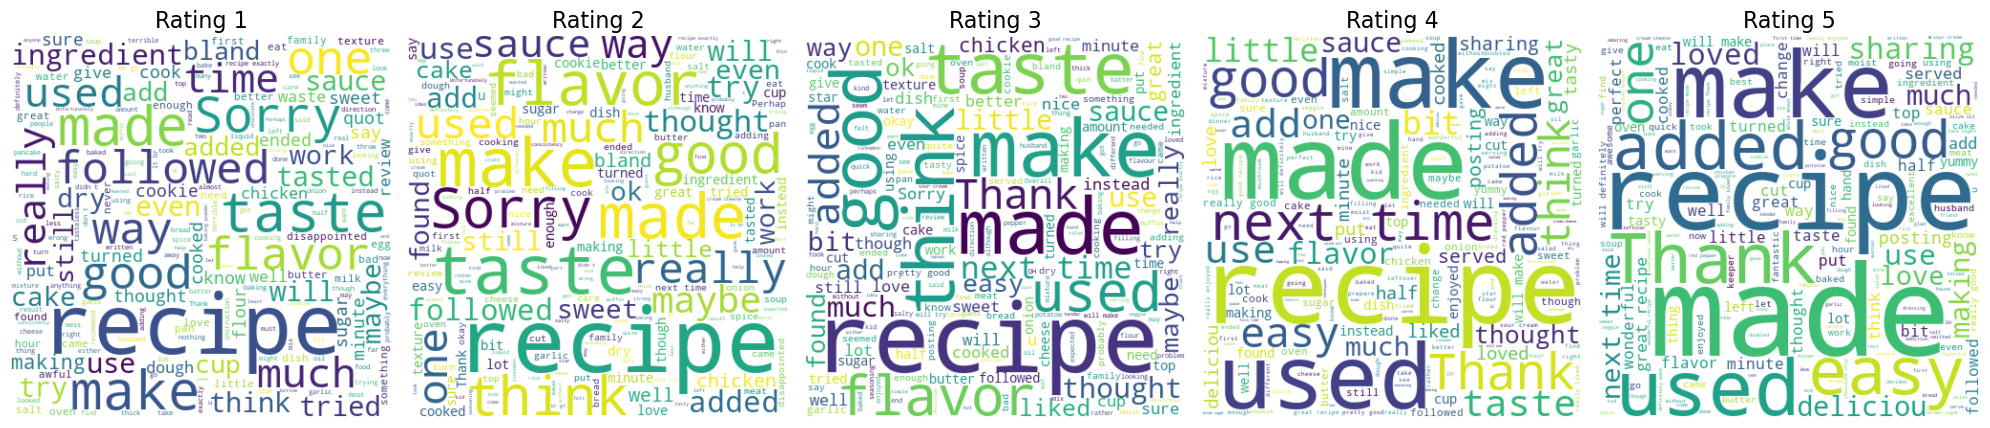

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter out rows with missing reviews
filtered_df = raw_interactions_df.dropna(subset=['review', 'rating'])

# Initialize a figure for subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

# Generate a word cloud for each rating (1 through 5)
for rating in range(1, 6):
    # Combine all reviews for the current rating
    reviews_for_rating = ' '.join(filtered_df[filtered_df['rating'] == rating]['review'])
    
    # Generate the word cloud
    wordcloud = WordCloud(
        width=400, height=400,
        background_color='white', colormap='viridis'
    ).generate(reviews_for_rating)
    
    # Plot the word cloud
    ax = axes[rating - 1]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Rating {rating}', fontsize=16)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [13]:
raw_interactions_df = dataframes.get('RAW_interactions')
raw_interactions_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


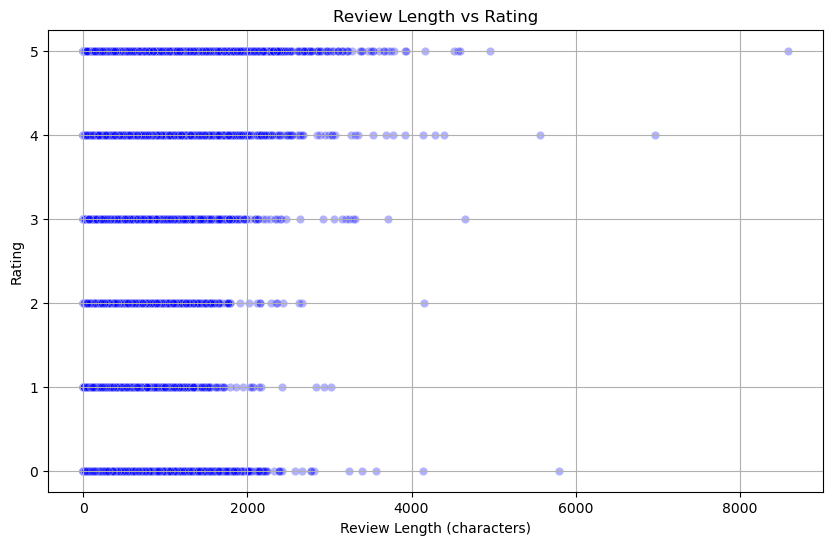

In [14]:
# Calculate review length
raw_interactions_df['review_length'] = raw_interactions_df['review'].str.len()

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='review_length', 
    y='rating', 
    data=raw_interactions_df, 
    alpha=0.3, 
    color='blue'
)
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()